<a href="https://colab.research.google.com/github/Fethbita/TalTech_ITI8730_Data_Mining_Final_Project/blob/main/Final%20Project%20with%20CUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Mount drive to colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import gzip
import torch
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
# https://stackoverflow.com/a/6252494/6077951
from scipy.stats import mode

In [3]:
def load_dataset(images_file, labels_file, mapping_file):
    with gzip.open(images_file, 'r') as infile:
        infile.read(16)
        images = infile.read()
    images = np.frombuffer(images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(-1, 28 * 28, 1).squeeze()
    images = torch.from_numpy(images).cuda()
    
    with gzip.open(labels_file, 'r') as infile:
        infile.read(8)
        labels = infile.read()
    labels = np.frombuffer(labels, dtype=np.uint8).astype(np.int64)

    with open(mapping_file, 'r') as infile:
        mapping = infile.read().splitlines()
    mapping = [int(i.split()[1]) for i in mapping]
    mapping = np.array(mapping)

    labels = mapping[labels]
    labels = torch.from_numpy(labels).cuda()

    return images, labels

In [4]:
dirname = "/content/gdrive/My Drive/TalTech/Data Mining/emnist/"
X_train, Y_train = load_dataset(dirname + 'emnist-balanced-train-images-idx3-ubyte.gz',
                                       dirname + 'emnist-balanced-train-labels-idx1-ubyte.gz',
                                       dirname + 'emnist-balanced-mapping.txt')

X_test, Y_test = load_dataset(dirname + 'emnist-balanced-test-images-idx3-ubyte.gz',
                                       dirname + 'emnist-balanced-test-labels-idx1-ubyte.gz',
                                       dirname + 'emnist-balanced-mapping.txt')

In [5]:
print(X_train.shape)
print(X_test.shape)

torch.Size([112800, 784])
torch.Size([18800, 784])


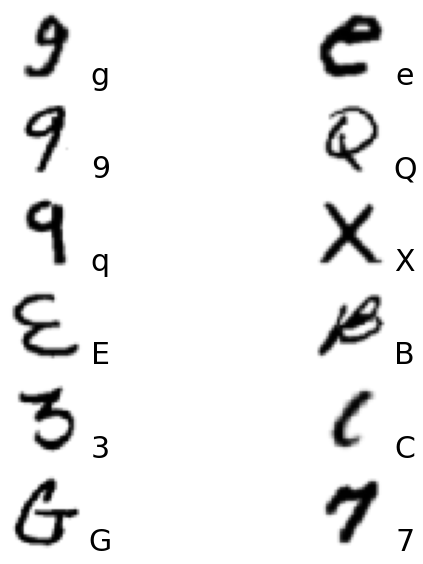

In [6]:
fig = plt.figure(figsize=(10, 10))

columns = 2
rows = 6
for i in range(columns * rows):
    img = np.transpose(np.asarray((255 - X_test[i].cpu()).reshape(28, 28)))
    fig.add_subplot(rows, columns, i+1)

    plt.imshow(img, cmap="gray")
    ax = plt.gca()
    ax.axis('off')
    ax.text(1.2, 0, chr(Y_test[i]), size=30, ha="center",
             transform=ax.transAxes)
plt.show()

In [7]:
def knn(dataset, labels, image, k):
    image = image.reshape((-1, 28*28))
    dists = torch.cdist(X_train, image)
    topk_val, topk_idx = dists.topk(7, dim=0, largest=False)
    most_freq, _ = torch.mode(Y_train[topk_idx], dim=0)
    return most_freq

result = knn(X_train, Y_train, X_test, 7)
number_of_correct = torch.sum(result == Y_test)
total = len(Y_test)
print("{} correct guesses out of {}, {:.2f}%, {} classes".format(number_of_correct,
                                                                 total,
                                                                 number_of_correct / total * 100,
                                                                 len(torch.unique(Y_test))))


14739 correct guesses out of 18800, 78.40%, 47 classes
